# Plotting for result 2

In [1]:
from data_process import *
from decay_rates_fit import exp_decay, ut, mt, vt
from model_test import adjusted_goodness

from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec 
from scipy.stats import pearsonr
import seaborn as sns
import pandas as pd
import numpy as np

## Data for plotting

In [2]:
x = pd.DataFrame({
    'floods': MAJOR_HISTORICAL_FLOODS,
    'servey': [SERVEY_YEAR] * 5,
    'x_slices': [np.arange(start, SERVEY_YEAR, 1) for start in MAJOR_HISTORICAL_FLOODS],
    'relative_level': major_floods['flood_level'] - W_MIN
})

## Memory decay trend

## Actual-forecast data plots

In [3]:
colors = ['b', 'g', 'r', 'c', 'm']

In [4]:
def get_plotting_data(data_kind):
    memory = stats_fre_questionnaris(datasets[data_kind], MAJOR_HISTORICAL_FLOODS, normalize=True)
    
    miu_s, n0 = [get_decay_params(data_kind, 'exp')[key] for key in ['k', 'n']]
    exp_influence = n0 * x['relative_level']/(W_MAX-W_MIN)
    y_data = memory['collective']
    y_simu = [exp_decay(SERVEY_YEAR, t0, exp_influence[t0], miu_s) for t0 in MAJOR_HISTORICAL_FLOODS]
    y_slices = [exp_decay(x['x_slices'].loc[t0], t0, exp_influence[t0], miu_s) for t0 in MAJOR_HISTORICAL_FLOODS]
    y_model = [arr[-1] for arr in y_slices]

    n, p, r, q = [get_decay_params(data_kind, 'iudm')[key] for key in ['n', 'p', 'r', 'q']]
    iudm_influence = n * x['relative_level']/(W_MAX-W_MIN)
    m_data, u_data, v_data = memory['sum'], memory['communicative'], memory['cultural']
    u_simu = [ut(SERVEY_YEAR - t0, iudm_influence[t0], p, r) for t0 in MAJOR_HISTORICAL_FLOODS]
    v_simu = [vt(SERVEY_YEAR - t0, iudm_influence[t0], p, r, q) for t0 in MAJOR_HISTORICAL_FLOODS]
    m_simu = [mt(SERVEY_YEAR - t0, iudm_influence[t0], p, r, q) for t0 in MAJOR_HISTORICAL_FLOODS]
    u_slices = [ut(x['x_slices'].loc[t0] - t0, iudm_influence[t0], p, r) for t0 in MAJOR_HISTORICAL_FLOODS]
    v_slices = [vt(x['x_slices'].loc[t0] - t0, iudm_influence[t0], p, r, q) for t0 in MAJOR_HISTORICAL_FLOODS]
    m_slices = [mt(x['x_slices'].loc[t0] - t0, iudm_influence[t0], p, r, q) for t0 in MAJOR_HISTORICAL_FLOODS]
    u_model = [arr[-1] for arr in u_slices]
    v_model = [arr[-1] for arr in v_slices]
    m_model = [arr[-1] for arr in m_slices]
    result = [
    exp_influence, iudm_influence, 
    y_simu, u_simu, v_simu, m_simu,
    y_model, u_model, v_model, m_model,
    y_data, u_data, v_data, m_data,
    y_slices, u_slices, v_slices, m_slices
    ]
    return result

Kind is all, OSM: 0.91, IUDM: 0.97
OSM: pearsonr is 0.97 and sig. is 0.006
IUDM: pearsonr is 0.98 and sig. is 0.003


Kind is farm, OSM: 0.74, IUDM: 0.90
OSM: pearsonr is 0.91 and sig. is 0.034
IUDM: pearsonr is 0.96 and sig. is 0.010


Kind is off-farm, OSM: 0.59, IUDM: 0.95
OSM: pearsonr is 0.87 and sig. is 0.055
IUDM: pearsonr is 0.87 and sig. is 0.055




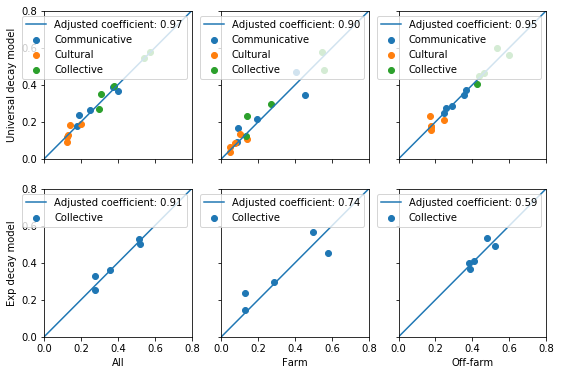

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(9, 6), sharex='all', sharey='all')
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6]
data_kinds = ['all', 'farm', 'off-farm']

for i in range(3):
    plotting_data = get_plotting_data(data_kinds[i])
    exp_influence, iudm_influence = plotting_data[:2]
    y_simu, u_simu, v_simu, m_simu = plotting_data[2:6]
    y_model, u_model, v_model, m_model = plotting_data[6:10]
    y_data, u_data, v_data, m_data = plotting_data[10:14]
    y_slices, u_slices, v_slices, m_slices = plotting_data[14:]
    iudm_data = np.array(list(u_data.values) + list(v_data.values) + list(m_data.values))
    iudm_model = np.array(u_model + v_model + m_model)
    
    ax = ax_list[i]
    ax.scatter(u_data, u_model, label='Communicative')
    ax.scatter(v_data, v_model, label='Cultural')
    ax.scatter(m_data, m_model, label='Collective')
    
    ax2 = ax_list[i+3]
    ax2.scatter(y_data, y_model, label='Collective')
    
    osm_adj = adjusted_goodness(y_data, y_model)
    iudm_adj = adjusted_goodness(iudm_data, iudm_model)
    u_adj = adjusted_goodness(u_data, u_model)
    v_adj = adjusted_goodness(v_data, v_model)
    m_adj = adjusted_goodness(m_data, m_model)
    print("Kind is {}, OSM: {:.2f}, IUDM: {:.2f}".format(data_kinds[i], osm_adj, iudm_adj))
#     print("Adj_m is {:.2f}, Adj_u is {:.2f}, Adj_v is {:.2f}".format(m_adj, u_adj, v_adj))
    
    ax.set_xlim(0, .8)
    ax.set_ylim(0, .8)
    ax2.set_xlim(0, .8)
    ax2.set_ylim(0, .8)
    
    ax2.plot(ax2.get_xticks(), ax.get_xticks(), label="Adjusted coefficient: {:.2f}".format(osm_adj))
    psn, sig = pearsonr(y_data, y_model)
    print("OSM: pearsonr is {:.2f} and sig. is {:.3f}".format(psn, sig))
    
    ax.plot(ax.get_xticks(), ax.get_xticks(), label="Adjusted coefficient: {:.2f}".format(iudm_adj))
    psn, sig = pearsonr(m_data, m_model)
    print("IUDM: pearsonr is {:.2f} and sig. is {:.3f}".format(psn, sig))
    print("\n")

[ax.legend() for ax in ax_list]
ax1.set_ylabel("Universal decay model")
ax4.set_ylabel("Exp decay model")
ax4.set_xlabel("All")
ax5.set_xlabel("Farm")
ax6.set_xlabel("Off-farm")

plt.savefig('images/supplementary_figure.jpg', dpi=300)
plt.show();

In [8]:
def get_text_loc(ax, x_ratio, y_ratio):
    a, b = ax.get_xlim()
    c, d = ax.get_ylim()
    return a + (b - a) * x_ratio, c + (d-c) * y_ratio

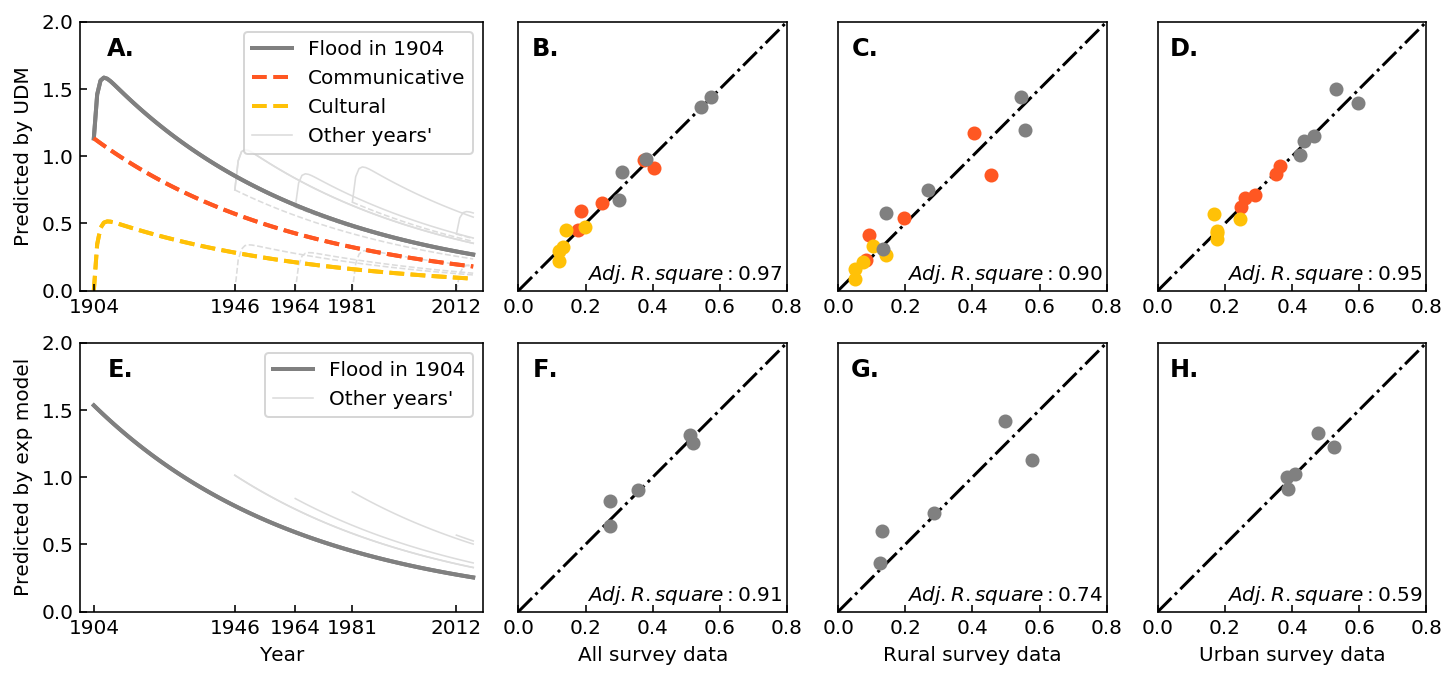

In [35]:
%config InlineBackend.figure_format ='retina'
# ['#FFC107', '#FF5722', '#00A0E8']  # read, heard, experienced

# 刻度朝内
plt.rcParams['xtick.direction'] = 'in'  # in; out; inout
plt.rcParams['ytick.direction'] = 'in'


#### 为所有数据的拟合画图  #####
plotting_data = get_plotting_data('all')
exp_influence, iudm_influence = plotting_data[:2]
y_simu, u_simu, v_simu, m_simu = plotting_data[2:6]
y_model, u_model, v_model, m_model = plotting_data[6:10]
y_data, u_data, v_data, m_data = plotting_data[10:14]
y_slices, u_slices, v_slices, m_slices = plotting_data[14:]
iudm_data = np.array(list(u_data.values) + list(v_data.values) + list(m_data.values))
iudm_model = np.array(u_model + v_model + m_model)


# plotting
fig = plt.figure(constrained_layout=True, figsize=(10, 4.6))
gs = GridSpec(2, 4, figure=fig, width_ratios=[1.5, 1, 1, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0], sharex=ax1)
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[0, 2])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[0, 3])
ax8 = fig.add_subplot(gs[1, 3])


# Fig A: UDM' decay
z = [1] + [0] * 4
linewidth = [2] + [.8] * 4

# Collective memory
colors_m = ['gray', 'gainsboro', 'gainsboro', 'gainsboro', 'gainsboro']
[ax1.plot(x['x_slices'].iloc[i], m_slices[i], lw=linewidth[i], c=colors_m[i], zorder=z[i]) for i in range(5)]
ax1.plot(x['x_slices'].iloc[0], m_slices[0], lw=linewidth[0], c=colors_m[0], zorder=z[0], label="Flood in 1904")

# Communicative
colors_u = ['#FF5722', 'gainsboro', 'gainsboro', 'gainsboro', 'gainsboro']
[ax1.plot(x['x_slices'].iloc[i], u_slices[i], '--', lw=linewidth[i], c=colors_u[i], zorder=z[i]) for i in range(5)]
ax1.plot(x['x_slices'].iloc[0], u_slices[0], '--', lw=linewidth[0], c=colors_u[0], zorder=z[0], label="Communicative")

colors_v = ['#FFC107', 'gainsboro', 'gainsboro', 'gainsboro', 'gainsboro']
[ax1.plot(x['x_slices'].iloc[i], v_slices[i], '--', lw=linewidth[i], c=colors_v[i], zorder=z[i]) for i in range(5)]
ax1.plot(x['x_slices'].iloc[0], v_slices[0], '--', lw=linewidth[0], c=colors_v[0], zorder=z[0], label="Cultural")

# Fig B: exp model's decay
[ax2.plot(x['x_slices'].iloc[i], y_slices[i], lw=linewidth[i], c=colors_m[i], zorder=z[i]) for i in range(5)]
ax2.plot(x['x_slices'].iloc[0], y_slices[0], lw=linewidth[0], c=colors_m[0], zorder=z[0], label="Flood in 1904")
ax2.plot(x['x_slices'].iloc[1], y_slices[1], lw=linewidth[1], c=colors_m[1], zorder=z[1], label="Other years'")

ax1.plot(x['x_slices'].iloc[1], m_slices[1], lw=linewidth[1], c=colors_m[1], zorder=z[1], label="Other years'")

# Fig C: 
ax3.scatter(u_data, u_model, color='#FF5722', label='Communicative', zorder=1)
ax3.scatter(v_data, v_model, color='#FFC107', label='Cultural', zorder=1)
ax3.scatter(m_data, m_model, color='gray', label='Collective', zorder=1)

# Fig D:
ax4.scatter(y_data, y_model, color='gray', label='Collective', zorder=1)


#### 绘制农村数据的图  ##### 
plotting_data = get_plotting_data('farm')
exp_influence, iudm_influence = plotting_data[:2]
y_simu, u_simu, v_simu, m_simu = plotting_data[2:6]
y_model, u_model, v_model, m_model = plotting_data[6:10]
y_data, u_data, v_data, m_data = plotting_data[10:14]
y_slices, u_slices, v_slices, m_slices = plotting_data[14:]
iudm_data = np.array(list(u_data.values) + list(v_data.values) + list(m_data.values))
iudm_model = np.array(u_model + v_model + m_model)

# Fig E:
ax5.scatter(u_data, u_model, color='#FF5722', label='Communicative', zorder=1)
ax5.scatter(v_data, v_model, color='#FFC107', label='Cultural', zorder=1)
ax5.scatter(m_data, m_model, color='gray', label='Collective', zorder=1)

# Fig D:
ax6.scatter(y_data, y_model, color='gray', label='Collective', zorder=1)

#### 绘制城市数据的图  ##### 
plotting_data = get_plotting_data('off-farm')
exp_influence, iudm_influence = plotting_data[:2]
y_simu, u_simu, v_simu, m_simu = plotting_data[2:6]
y_model, u_model, v_model, m_model = plotting_data[6:10]
y_data, u_data, v_data, m_data = plotting_data[10:14]
y_slices, u_slices, v_slices, m_slices = plotting_data[14:]
iudm_data = np.array(list(u_data.values) + list(v_data.values) + list(m_data.values))
iudm_model = np.array(u_model + v_model + m_model)

# Fig F:
ax7.scatter(u_data, u_model, color='#FF5722', label='Communicative', zorder=1)
ax7.scatter(v_data, v_model, color='#FFC107', label='Cultural', zorder=1)
ax7.scatter(m_data, m_model, color='gray', label='Collective', zorder=1)

# Fig G:
ax8.scatter(y_data, y_model, color='gray', label='Collective', zorder=1)

# 修饰
ax1.set_ylabel("Predicted by UDM")
ax2.set_ylabel("Predicted by exp model")
ax2.set_xlabel("Year")
ax4.set_xlabel('All survey data')
ax6.set_xlabel("Rural survey data")
ax8.set_xlabel("Urban survey data")

for ax in [ax1, ax2]:
    ax.set_ylim(0, 2)
    ax.set_xlim(1900, 2020)
    ax.set_xticks(MAJOR_HISTORICAL_FLOODS)
    ax.legend()

labels = [
    "$Adj. R.square: 0.97$",
    "$Adj. R.square: 0.91$",
    "$Adj. R.square: 0.90$",
    "$Adj. R.square: 0.74$",
    "$Adj. R.square: 0.95$",
    "$Adj. R.square: 0.59$",
]

axs = [ax3, ax4, ax5, ax6, ax7, ax8]
orders = ['B', 'F', 'C', 'G', 'D', 'H']

for i in range(6):
    ax = axs[i]
    ax.yaxis.set_visible(False)  # 取消Y轴显示
    ax.set_ylim(0, 0.8)
    ax.set_xlim(0, 0.8)
    ax.plot(ax.get_xticks(), ax.get_xticks(), '-.', color='black', zorder=0, label='1:1 line')  # 绘制1:1线
    xloc, yloc = get_text_loc(ax, 0.62, 0.06) 
    ax.text(xloc, yloc, labels[i], ha='center', va='center')  # 注释调整后R2
    label_xloc, label_yloc = get_text_loc(ax, 0.1, 0.9)
    ax.text(label_xloc, label_yloc, orders[i]+'.', ha='center', va='center', weight='bold', size='large')  # 注释图序

# 为图AB增加图序
label_xloc, label_yloc = get_text_loc(ax1, 0.1, 0.9)
ax1.text(label_xloc, label_yloc, "A.", ha='center', va='center', weight='bold', size='large')
label_xloc, label_yloc = get_text_loc(ax2, 0.1, 0.9)
ax2.text(label_xloc, label_yloc, "E.", ha='center', va='center', weight='bold', size='large')
plt.savefig('images/result2_v2.jpg', format='jpg', dpi=300)
plt.show();